In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

In [3]:
def z(X):
    x1, x2 = X[0], X[1]
    t1 = (x2**2)*2 - (4*x1) + 2
    t2 = x1**2 - (x2*2) - 1
    return [t1, t2]

In [4]:
T = np.array([z(i) for i in x])

In [5]:
for i in T:
    print (i)

[-2  0]
[ 4 -3]
[4 1]
[6 0]
[10 -5]
[10  3]
[10  3]


In [6]:
from sklearn import svm

In [7]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(T, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(3, 2)


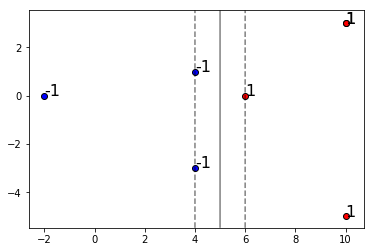

In [8]:
for i, j in enumerate(T):
    t1, t2 = j[0], j[1]
    if y[i] == 1:
        plt.scatter(t1, t2, c='r', edgecolors='k')
        plt.annotate('1', (t1,t2),  fontsize=16)
    elif y[i] == -1:
        plt.scatter(t1, t2, c='b', edgecolors='k')
        plt.annotate('-1', (t1,t2),  fontsize=16)

        
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')

plt.savefig('1.png')
plt.show()

In [9]:
clf.dual_coef_

array([[-0.12500137, -0.37498225,  0.49998361]])